In [55]:
import mlflow
from mlflow.client import MlflowClient


import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy  as np
from numpy import random as rd
from matplotlib import pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

import pandas as pd

# Generando data sintetica

In [2]:
num_data = 10**3

x1 = rd.normal(loc = 0, size = num_data)
x2 = rd.normal(loc = 4, size = num_data)

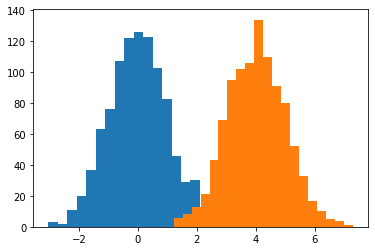

In [3]:
plt.hist(x1, bins = 20)
plt.hist(x2, bins = 20)

plt.show()

In [4]:
df = pd.DataFrame({'X':[*x1] + [*x2],'y':[0]*num_data + [1]*num_data})
df 

,X,y
0,-1.839968,0
1,0.943447,0
2,-1.168912,0
3,0.858790,0
4,0.340871,0
...,...,...
1995,4.772970,1
1996,5.047226,1
1997,4.295886,1
1998,5.087524,1


# Fiteando un modelo cualquiera
### La pregunta es? Una vez fiteado que hago con él? 

In [5]:
model = DecisionTreeClassifier(max_depth = 1)
model.fit(df[['X']],df['y'])

DecisionTreeClassifier(max_depth=1)

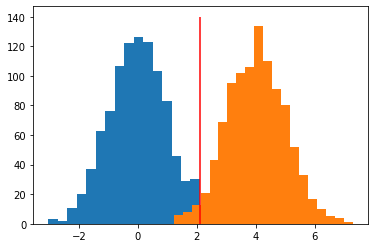

In [8]:
plt.vlines(model.tree_.threshold[0],0,140, color = 'red')

plt.hist(x1, bins = 20)
plt.hist(x2, bins = 20)

plt.show()

# Guardo mi modelo usando mlflow

In [12]:
with mlflow.start_run():
    model = DecisionTreeClassifier(max_depth = 1)
    model.fit(df[['X']],df['y'])
    
    mlflow.sklearn.log_model(model,'model')
    mlflow.set_tag('developer','camilo')
    
    
    train_accuracy = (model.predict(df[['X']]) == df['y']).mean()
    
    mlflow.log_metric('train_accuracy',train_accuracy)

# Usando el autolog muchas metricas se guardan solas...

In [ ]:
mlflow.sklearn.autolog()

X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'])

In [20]:
with mlflow.start_run():
    model = DecisionTreeClassifier(max_depth = 1)
    model.fit(X_train[['X']],y_train)
    
    mlflow.set_tag('developer','camilo')
    
    
    test_acc = (model.predict(X_test[['X']]) == y_test).mean()
    
    mlflow.log_metric('test_acc',test_acc)

In [ ]:
with mlflow.start_run():
    model = SVC(max_depth = 1)
    model.fit(X_train[['X']],y_train)
    
    mlflow.set_tag('developer','camilo')
    
    
    test_acc = (model.predict(X_test[['X']]) == y_test).mean()
    
    mlflow.log_metric('test_acc',test_acc)

In [ ]:
with mlflow.start_run():
    model = LogisticRegression(max_depth = 1)
    model.fit(X_train[['X']],y_train)
    
    mlflow.set_tag('developer','camilo')
    
    
    test_acc = (model.predict(X_test[['X']]) == y_test).mean()
    
    mlflow.log_metric('test_acc',test_acc)

# Tarea: Reescribir estos pedazos de código que hacen cosas repetidas en uan sola función.

# Gracias a mlflow puedo acceder a las métricas de cada run/modelo fiteado

In [24]:
#Buscar los runs en el servidor 
runs =  mlflow.search_runs()
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_score,metrics.training_precision_score,metrics.training_recall_score,metrics.train_accuracy,...,params.decision_function_shape,params.break_ties,params.shrinking,tags.estimator_class,tags.estimator_name,tags.mlflow.source.name,tags.developer,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.log-model.history
0,8820681460e148bfbc745845523ff801,0,FINISHED,file:///Users/camiloamadio/Desktop/Untitled%20...,2022-09-24 14:04:46.897000+00:00,2022-09-24 14:04:50.906000+00:00,0.976667,0.976667,0.976667,0.976667,...,None,None,None,sklearn.linear_model._logistic.LogisticRegression,LogisticRegression,/Users/camiloamadio/miniconda3/lib/python3.9/s...,camilo,LOCAL,camiloamadio,"[{""run_id"": ""8820681460e148bfbc745845523ff801""..."
1,e9b9882388374b2da6466e90cd3039b6,0,FINISHED,file:///Users/camiloamadio/Desktop/Untitled%20...,2022-09-24 14:00:28.249000+00:00,2022-09-24 14:00:31.977000+00:00,0.978667,0.978679,0.978667,0.978667,...,None,None,None,sklearn.tree._classes.DecisionTreeClassifier,DecisionTreeClassifier,/Users/camiloamadio/miniconda3/lib/python3.9/s...,camilo,LOCAL,camiloamadio,"[{""run_id"": ""e9b9882388374b2da6466e90cd3039b6""..."
2,793d83c0e3414e69bf19eb416ad712b6,0,FINISHED,file:///Users/camiloamadio/Desktop/Untitled%20...,2022-09-24 14:00:22.625000+00:00,2022-09-24 14:00:26.983000+00:00,0.976667,0.976668,0.976667,0.976667,...,ovr,False,True,sklearn.svm._classes.SVC,SVC,/Users/camiloamadio/miniconda3/lib/python3.9/s...,camilo,LOCAL,camiloamadio,"[{""run_id"": ""793d83c0e3414e69bf19eb416ad712b6""..."


In [35]:
best_model_run_id = runs.sort_values(by = ['metrics.test_accuracy'], ascending = False).iloc[0]['run_id']
best_model_run_id

'8820681460e148bfbc745845523ff801'

In [37]:
#Cargar el modelo como la libreria nativa en la que fue guardada
best_model = mlflow.sklearn.load_model(
    f'/Users/camiloamadio/Desktop/Untitled Folder/mlruns/0/{best_model_run_id}/artifacts/model')

In [51]:
best_model

LogisticRegression()

In [44]:
#cagar el modelo como un wrapper de mlflow
best_model_pyfunc = mlflow.pyfunc.load_model(
    f'/Users/camiloamadio/Desktop/Untitled Folder/mlruns/0/{best_model_run_id}/artifacts/model')

In [ ]:
best_model_pyfunc

In [ ]:
#Ver la implementación del modelo
best_model_pyfunc._model_impl

# Feature importante de mlflow, ya se encarga automaticamente del tunning

In [61]:
#Ver que al hacer un grid search se guardan los child runs
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

2022/09/24 11:26:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8e1c206b8c484f78a5856d27a2918847', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/24 11:26:24 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

# Para registrar modelos hay que decirle a mlflow donde está la base de datos que se va a usar

In [ ]:
mlflow.set_registry_uri('sqlite:///mlruns.db')

client = mlflow.client.MlflowClient()

In [67]:
#Creo la primera versión
mlflow.register_model(f'/Users/camiloamadio/Desktop/Untitled Folder/mlruns/0/{best_model_run_id}/artifacts/model',
                     'model_churn')

Successfully registered model 'model_churn'.
2022/09/24 12:11:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: model_churn, version 1
Created version '1' of model 'model_churn'.


<ModelVersion: creation_timestamp=1664032301899, current_stage='None', description=None, last_updated_timestamp=1664032301899, name='model_churn', run_id=None, run_link=None, source=('/Users/camiloamadio/Desktop/Untitled '
 'Folder/mlruns/0/8820681460e148bfbc745845523ff801/artifacts/model'), status='READY', status_message=None, tags={}, user_id=None, version=1>

In [68]:
#Creo una nueva version
mlflow.register_model(f'/Users/camiloamadio/Desktop/Untitled Folder/mlruns/0/{best_model_run_id}/artifacts/model',
                     'model_churn')

Registered model 'model_churn' already exists. Creating a new version of this model...
2022/09/24 12:12:52 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: model_churn, version 2
Created version '2' of model 'model_churn'.


<ModelVersion: creation_timestamp=1664032372670, current_stage='None', description=None, last_updated_timestamp=1664032372670, name='model_churn', run_id=None, run_link=None, source=('/Users/camiloamadio/Desktop/Untitled '
 'Folder/mlruns/0/8820681460e148bfbc745845523ff801/artifacts/model'), status='READY', status_message=None, tags={}, user_id=None, version=2>

In [78]:
#Puedo levantar mi modelo por versiones o por estadío
mlflow.sklearn.load_model('models:/model_churn/2')

LogisticRegression()

In [79]:
mlflow.pyfunc.load_model('models:/model_churn/2')

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 8820681460e148bfbc745845523ff801

In [84]:
#Asumiendo que ya se pasó un modelo a producción y otro a staging usando la UI
model_prod    = mlflow.pyfunc.load_model('models:/model_churn/production')
model_staging = mlflow.pyfunc.load_model('models:/model_churn/staging')

In [93]:
#Asumiendo que ya hay un proceso que recolecta la ground truth y lo puedo levantar desde python 

accuracy_model_prod = (model_prod.predict(df[['X']]) == df['y']).mean()
accuracy_model_staging = (model_staging.predict(df[['X']]) == df['y']).mean()

In [116]:
if accuracy_model_staging > accuracy_model_prod:
    
    current_version_staging_model = list(filter(lambda row: row.current_stage == 'Staging', 
                                                client.get_latest_versions('model_churn')))[0].version
    
    client.transition_model_version_stage('model_churn', 
                                          current_version_staging_model,
                                          "production", 
                                          archive_existing_versions = True)